# Réseaux de neurones à convolution CIFAR10

## Imports

In [2]:
%matplotlib inline

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
import keras
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import time

## CNN basique

Chargement du jeu de données CIFAR10 depuis  `keras.datasets.cifar10.load_data()`, et découpage en jeux de train, test et validation : train (45,000 images), validation (5,000 images) et test (10,000 images). 
Normalisation des valeur de pixel et visualisation.

In [19]:
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]
num_classes=len(classes)

In [26]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()
y_train_full = to_categorical(y_train_full)
y_test_full = to_categorical(y_test)
X_train,  X_valid,y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
X_train = X_train/255
X_valid =X_valid/255
X_test = X_test/255

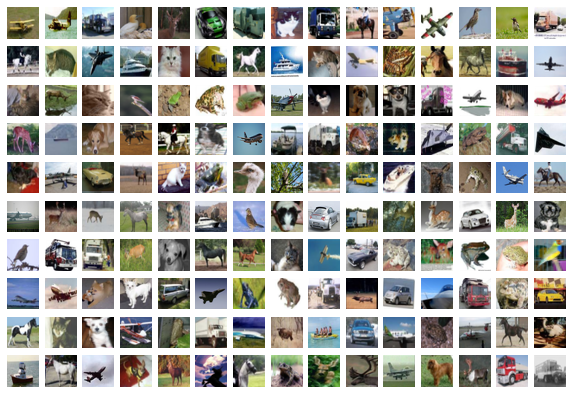

In [27]:
plt.figure(figsize=(10, 7))
n_rows, n_cols = 10, 15
for row in range(n_rows):
    for col in range(n_cols):
        i = row * n_cols + col
        plt.subplot(n_rows, n_cols, i + 1)
        plt.axis("off")
        plt.imshow(X_train[i])

Un premier modèle à convolution

In [28]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=[32, 32, 3]),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.01), metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_valid, y_valid))

Epoch 1/20
1172/1172 [==============================] - 10s 9ms/step - loss: 2.0404 - accuracy: 0.2522 - val_loss: 1.5940 - val_accuracy: 0.4353
Epoch 2/20
1172/1172 [==============================] - 10s 8ms/step - loss: 1.5707 - accuracy: 0.4359 - val_loss: 1.4371 - val_accuracy: 0.4818
Epoch 3/20
1172/1172 [==============================] - 10s 8ms/step - loss: 1.3466 - accuracy: 0.5238 - val_loss: 1.3536 - val_accuracy: 0.5226
Epoch 4/20
1172/1172 [==============================] - 10s 8ms/step - loss: 1.2191 - accuracy: 0.5686 - val_loss: 1.2379 - val_accuracy: 0.5625
Epoch 5/20
1172/1172 [==============================] - 10s 8ms/step - loss: 1.1047 - accuracy: 0.6095 - val_loss: 1.1090 - val_accuracy: 0.6045
Epoch 6/20
1172/1172 [==============================] - 9s 8ms/step - loss: 0.9438 - accuracy: 0.6683 - val_loss: 1.0928 - val_accuracy: 0.6184
Epoch 7/20
1172/1172 [==============================] - 10s 8ms/step - loss: 0.8040 - accuracy: 0.7148 - val_loss: 1.1795 - val_acc

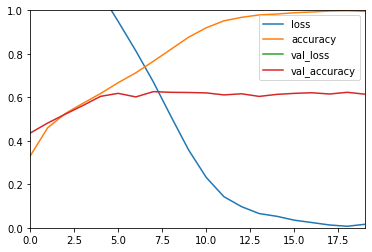

In [29]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 3])
plt.show()

avec dropout et pooling

In [30]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Conv2D(32, (3, 3), input_shape=(32,32,3), padding='same', activation='relu'))
model2.add(keras.layers.Dropout(0.2))
model2.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(512, activation='relu'))
model2.add(keras.layers.Dropout(0.5))
model2.add(keras.layers.Dense(num_classes, activation='softmax'))

# Compile model
epochs = 10
lrate = 0.001
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)              

In [32]:
history = model2.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1172/1172 [==============================] - 7s 5ms/step - loss: 1.8881 - accuracy: 0.3195 - val_loss: 1.2724 - val_accuracy: 0.5491
Epoch 2/10
1172/1172 [==============================] - 6s 5ms/step - loss: 1.2706 - accuracy: 0.5471 - val_loss: 1.1143 - val_accuracy: 0.6104
Epoch 3/10
1172/1172 [==============================] - 6s 5ms/step - loss: 1.0670 - accuracy: 0.6208 - val_loss: 1.0025 - val_accuracy: 0.6429
Epoch 4/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.9538 - accuracy: 0.6602 - val_loss: 0.9456 - val_accuracy: 0.6741
Epoch 5/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.8580 - accuracy: 0.6948 - val_loss: 0.9565 - val_accuracy: 0.6731
Epoch 6/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.7703 - accuracy: 0.7247 - val_loss: 0.9369 - val_accuracy: 0.6843
Epoch 7/10
1172/1172 [==============================] - 6s 5ms/step - loss: 0.6879 - accuracy: 0.7563 - val_loss: 0.9431 - val_accuracy:

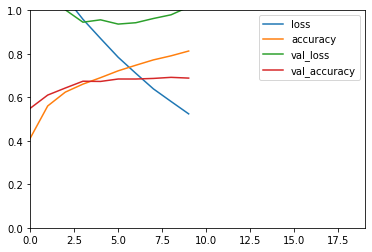

In [33]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 1])
plt.show()

### Normalisation
Pour corriger le surapprentissage il est possible d'azjouter une couche de normalisation : Batch Normalization après chaque couche de convolution.

In [34]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.01), metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1172/1172 [==============================] - 7s 5ms/step - loss: 1.6247 - accuracy: 0.4259 - val_loss: 1.4343 - val_accuracy: 0.4884
Epoch 2/20
1172/1172 [==============================] - 6s 6ms/step - loss: 1.0024 - accuracy: 0.6456 - val_loss: 1.1863 - val_accuracy: 0.5895
Epoch 3/20
1172/1172 [==============================] - 6s 5ms/step - loss: 0.7928 - accuracy: 0.7199 - val_loss: 0.9120 - val_accuracy: 0.6876
Epoch 4/20
1172/1172 [==============================] - 6s 5ms/step - loss: 0.6421 - accuracy: 0.7757 - val_loss: 0.8907 - val_accuracy: 0.6930
Epoch 5/20
1172/1172 [==============================] - 6s 5ms/step - loss: 0.5184 - accuracy: 0.8176 - val_loss: 0.8939 - val_accuracy: 0.6993
Epoch 6/20
1172/1172 [==============================] - 6s 5ms/step - loss: 0.4136 - accuracy: 0.8588 - val_loss: 0.8852 - val_accuracy: 0.7107
Epoch 7/20
1172/1172 [==============================] - 6s 5ms/step - loss: 0.3242 - accuracy: 0.8917 - val_loss: 0.8468 - val_accuracy:

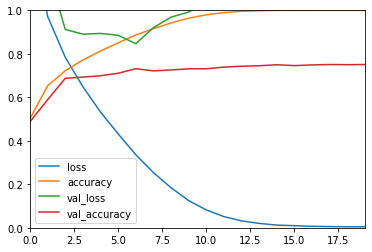

In [35]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 1])
plt.show()